# Programming Assignment - 10
---
## Name: Patrick McElroy
---

In [209]:
# Import required packages
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix

import time

np.random.seed(100)
%matplotlib inline

## Question 1
---
Create the sparse COO representation ( [ref](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html#scipy.sparse.coo_matrix)) of the adjacency matrix (no need to find the dense representation) of the following graph. Find its CSR representation using appropriate Python function. Visualize this matrix by using spy() function. Refer to the notebook of Lecture 10 live session. 

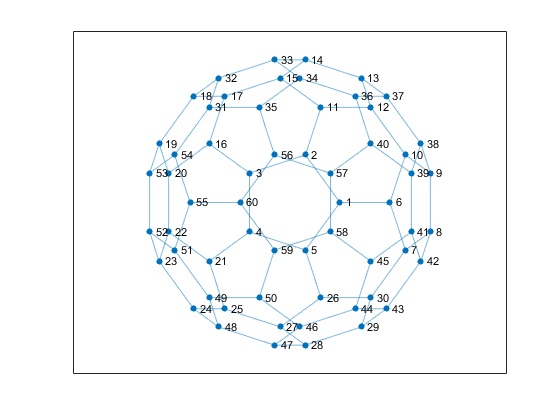

[Image source: Mathworks](https://in.mathworks.com/help/examples/matlab/win64/buckydem_02.png)

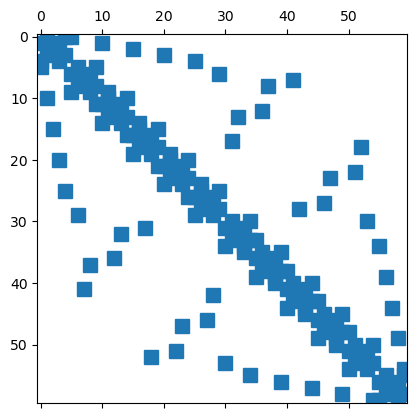

In [202]:
# Your code comes here
row = np.array([])
for i in range(0,60):
    row = np.append(row, np.array([i]*3))


col = np.array([2, 5, 6, 1, 3, 11, 2, 4, 16, 3, 5, 21, 1, 4, 26, 1, 7, 10, 6, 8, 30, 7, 9, 42, 8, 10, 38, 6, 9, 12,
                2, 12, 15, 10, 11, 13, 12, 14, 37, 13, 15, 33, 11, 14, 17, 3, 17, 20, 15, 16, 18, 17, 19, 32, 18, 20, 53, 16, 19, 22,
                4, 22, 25, 20, 21, 23, 22, 24, 52, 23, 25, 48, 21, 24, 27, 5, 27, 30, 25, 26, 28, 27, 29, 47, 28, 30, 43, 7, 26, 29,
                32, 35, 54, 18, 31, 33, 14, 32, 34, 33, 35, 36, 31, 34, 56, 34, 37, 40, 13, 36, 38, 9, 37, 39, 38, 40, 41, 36, 39, 57,
                39, 42, 45, 8, 41, 43, 29, 42, 44, 43, 45, 46, 41, 44, 58, 44, 47, 50, 28, 46, 48, 24, 47, 49, 48, 50, 51, 46, 49, 59,
                49, 52, 55, 23, 51, 53, 19, 52, 54, 31, 53, 55, 51, 54, 60, 35, 57, 60, 40, 56, 58, 45, 57, 59, 50, 58, 60, 55, 56, 59])


data = np.array([1]*180)

col = col-data


coo_mat  = coo_matrix((data, (row,col)), shape=(60, 60))

csr_mat = csr_matrix(coo_mat.toarray())

plt.spy(csr_mat)

## Question 2
---
>- Write a Python function that returns the dominating eigenvalue-eigenvector pair of a given square matrix by using the power method. 

>- Create a second version of the code that does the same for a sparse matrix given in CSR format.

>- Generate a random sparse matrix $A$ of uniformly distributed random numbers between -1 and 1 of order $100 \times 100$ which is around 95% sparse.

>- Call these two functions and compare the time it takes to calculate the dominating eigen-pair of $A$. Report your observation.

In [203]:
# Your code comes here

def power_method(A, max_iter):
    v_old = np.random.rand(A.shape[1]) # Why should you choose randomly
    #csrA = csr_matrix(A)
    for k in range(max_iter):
        v_new = A.dot(v_old)

        # Need to normalize
        v_new = v_new / np.linalg.norm(v_new)
        # Test for convergence
        v_old = v_new
        
    evalue = np.dot(v_new,A.dot(v_new))/np.linalg.norm(v_new)
    return v_new, evalue

In [204]:
def csr_power_method(Q, max_iter):
    Q_csr = csr_matrix(Q)
    z = np.random.rand(Q.shape[1]) 
    z = z / np.linalg.norm(z,ord=1) 
    alpha=0.85
    v = np.ones((Q.shape[1],), dtype=float)
    v = v / np.linalg.norm(v,ord=1) 
    for k in range(max_iter):
        y=alpha*Q_csr.dot(z)
        beta = 1.0 - np.linalg.norm(y,ord=1)
        z = y + beta * v
        residual = np.linalg.norm(y-z,ord=1)
        if residual < 0.0001:
            break
    return z

In [210]:
A = np.array([])

for i in range(0,400):
    x = random.uniform(-1, 1)
    A = np.append(A, np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, x]))
A = A.reshape(100, 100)


start=time.time()

v, eig = power_method(A, 100)

end=time.time()
sparse_time = end - start
print(f"Power Method Time: {sparse_time}")

Power Method Time: 0.01162409782409668


In [206]:
start1=time.time()

z = csr_power_method(A, 100)

end1=time.time()
sparse_time1 = end1 - start1
print(f"Sparse time: {sparse_time1}")

Sparse time: 0.012153148651123047
